In [1]:
# load library
import csv  
import datetime 
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
# load data
# df = pd.read_csv('./data/sebaran-hotspot-agustus.csv')
# df = pd.read_csv('./data/sebaran-hotspot.csv')
df = pd.read_csv('./data/sebaran-hotspot-4.csv')
df.head()

provinsi    kabupaten   kecamatan             desa   tanggal  \
0  Kalimantan Barat  KAPUAS HULU       BADAU            BADAU  1/9/2019   
1  Kalimantan Barat    KUBU RAYA  BATU AMPAR  TANJUNG HARAPAN  1/9/2019   
2  Kalimantan Barat    KUBU RAYA  BATU AMPAR  TANJUNG HARAPAN  1/9/2019   
3  Kalimantan Barat    KUBU RAYA  BATU AMPAR  TANJUNG HARAPAN  1/9/2019   
4  Kalimantan Barat  KAPUAS HULU    EMPANANG     NANGA KANTUK  1/9/2019   

    waktu     satelit confidence  latitude   longitude  
0  06:17   TERRA/AQUA     Medium  1.024302  111.886742  
1  06:20   NASA-MODIS     Medium -0.896000  109.686000  
2  06:17   TERRA/AQUA     Medium -0.896321  109.685867  
3  06:16   TERRA/AQUA     Medium -0.896321  109.685867  
4  06:17   TERRA/AQUA     Medium  0.812014  111.762520

In [4]:
def isTimeFormat(input):
    try:
        datetime.datetime.strptime(input, '%d-%m-%Y')
        return True
    except ValueError:
        return False

# duplicate csv
header = ['provinsi' ,'kabupaten' ,'kecamatan', 'desa', 'tanggal', 'waktu' ,'satelit' ,'confidence' ,'latitude' ,'longitude']
with open('./data/sebaran-hotspot-4-fix.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # loop row data
    for i, data in df.iterrows():
        
        if isTimeFormat(data['tanggal']) == True:
            date = datetime.datetime.strptime(data['tanggal'], '%d-%m-%Y').strftime('%Y-%m-%d')
        else:
            date = datetime.datetime.strptime(data['tanggal'], '%d/%m/%Y').strftime('%Y-%m-%d')

        data = [data['provinsi'],data['kabupaten'],data['kecamatan'],data['desa'],date,data['waktu'],data['satelit'],data['confidence'],data['latitude'],data['longitude']]
        # write the data
        writer.writerow(data)

In [ ]:
# remove column not used
columns = [column for column in df.columns.values.tolist() if column != 'latitude' and column != 'longitude'] 
df = df.drop(columns,axis=1)
df

latitude   longitude
0     0.394000  109.107000
1     1.022754  111.153770
2    -0.513400  111.570862
3     0.799911  112.649826
4    -0.236444  110.947128
...        ...         ...
2115 -1.819190  110.183000
2116  1.469000  109.114000
2117  0.587000  112.055000
2118  1.361430  109.121000
2119  0.296000  111.435000

[2120 rows x 2 columns]

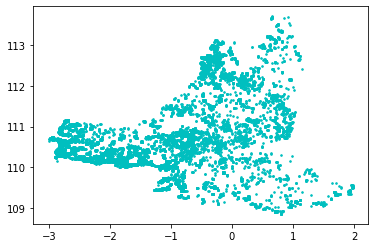

In [5]:
# visualisasi data
plt.scatter(df.latitude , df.longitude, s =10, c = 'c', marker = '.', alpha = 1)
plt.show()

In [6]:
# lookup data 
df_x = df.iloc[:,0:3]
df_x.head()

provinsi    kabupaten   kecamatan
0  Kalimantan Barat  KAPUAS HULU       BADAU
1  Kalimantan Barat    KUBU RAYA  BATU AMPAR
2  Kalimantan Barat    KUBU RAYA  BATU AMPAR
3  Kalimantan Barat    KUBU RAYA  BATU AMPAR
4  Kalimantan Barat  KAPUAS HULU    EMPANANG

In [16]:
# tranform array 
dfx_array = np.array(df_x)
dfx_array

array([['Kalimantan Barat', 'KAPUAS HULU', 'BADAU'],
       ['Kalimantan Barat', 'KUBU RAYA', 'BATU AMPAR'],
       ['Kalimantan Barat', 'KUBU RAYA', 'BATU AMPAR'],
       ...,
       ['Kalimantan Barat', 'KETAPANG', 'MATAN HILIR SELATAN'],
       ['Kalimantan Barat', 'KETAPANG', 'MATAN HILIR SELATAN'],
       ['Kalimantan Barat', 'KETAPANG', 'MATAN HILIR UTARA']],
      dtype=object)

In [17]:
# scalling
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(dfx_array)
x_scaled

ValueError: could not convert string to float: 'Kalimantan Barat'

In [18]:
# cluster
n_random = random. randint(0,500) 
kmeans = KMeans(n_clusters = 7, random_state=n_random)
kmeans.fit(x_scaled)

NameError: name 'x_scaled' is not defined

In [19]:
# show centroid
kmeans.cluster_centers_

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [20]:
# adjust column cluster
df['cluster'] = kmeans.labels_

AttributeError: 'KMeans' object has no attribute 'labels_'

In [ ]:
# plotting data cluster
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df.cluster, marker = 'x', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=1 , marker='o')
plt.title('Hasil Klustering K-Means - Data HotSpot Kalimantan Barat')
plt.show()

NameError: name 'plt' is not defined